# Simulation of Phonon Scattering in Single Crystal Silicon

Instrument: ARCS
* Ei=100meV
* Fermi chopper: 600 Hz
* T0: 120Hz
 
Sample: silicon


## Step 0. some goodies

In [1]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# where am I?
import os
PWD=os.path.abspath(".")
print PWD
# It should be the directory where this jupyter notebook is

/home/lj7/dv/mcvine/workflow/notebook-examples/ARCS/Si


## Step 1. Create dir structure

In [3]:
# Create a working directory for the simulation
# Change the following line to your own directory!!!
# This directory should not exist yet. It will be created later.
workdir = "/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n2e8"

In [4]:
# Prepare sample description.
# It will be used to generate files for the simulation
# and will be used in reduction and analysis

In [5]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
 - type: phonon
   idf_dir: /SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/100K-50cube
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Writing Si.yml


In [6]:
# let mcvine workflow scaffolding helps you build the simulation directory

In [7]:
!mcvine workflow singlecrystal --outdir={workdir} --type=DGS \
    --instrument=ARCS --sample=Si.yml

In [61]:
# change to local working directory
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n2e8


In [63]:
# list dir contents
# !ls .

In [10]:
# move sample yml file here
!mv {PWD}/Si.yml .

In [64]:
# !ls .

## Step 2. Setup beam simulation

In [12]:
# In this example we won't simulate a new beam but will reuse an existing beam
# First remove the beam dir
# !!! Be very careful with rm -rf !!!
!rm -rf beam
# Then make a symlink
!ln -s /SNS/users/lj7/simulations/ARCS/beam/100meV beam

In [13]:
ls -l {workdir}

total 20
lrwxrwxrwx 1 lj7 users  43 Aug  6 11:12 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users  73 Jul 27 13:01 README.md
drwxr-xr-x 1 lj7 users  83 Aug  6 11:11 sampleassembly/
drwxr-xr-x 1 lj7 users  47 Jul 28 17:36 scattering/
-rw-r--r-- 1 lj7 users 579 Aug  6 11:11 Si.yml


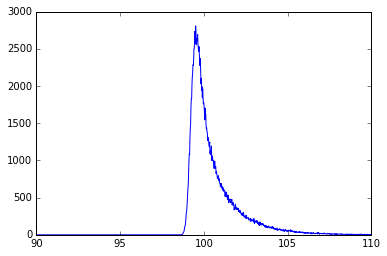

In [67]:
# check beam energy profile
import histogram.hdf as hh
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check and update sample assembly

In [27]:
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n5e8


** Different from the example in mcvine training material, here we are going to use an existing sample assembly **

In [16]:
# first move the existing sample assembly to a different name
! mv sampleassembly/ sampleassembly-by-mcvine-scaffolding

In [17]:
# This is where the prebuilt sample assembly is
sampleassembly_dir = "/SNS/users/lj7/simulations/samples/Si/demo/100K"

In [18]:
# copy it to the working dir
!rsync -avzL {sampleassembly_dir}/ sampleassembly/

sending incremental file list
created directory sampleassembly
./
Si-scatterer.xml
Si.xyz
sampleassembly.xml
Si-phonons/
Si-phonons/DOS
Si-phonons/FORCE_CONSTANTS
Si-phonons/Omega2
Si-phonons/POSCAR
Si-phonons/Polarizations
Si-phonons/Qgridinfo
Si-phonons/compute.py
Si-phonons/dos-withbroadening.dat
Si-phonons/run.sh

sent 72,300,157 bytes  received 296 bytes  13,145,536.91 bytes/sec
total size is 91,479,703  speedup is 1.27


In [19]:
ls -l

total 24
lrwxrwxrwx 1 lj7 users  43 Aug  6 11:12 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users  73 Jul 27 13:01 README.md
drwxr-xr-x 1 lj7 users 104 Aug  4 09:15 sampleassembly/
drwxr-xr-x 1 lj7 users  83 Aug  6 11:11 sampleassembly-by-mcvine-scaffolding/
drwxr-xr-x 1 lj7 users  47 Jul 28 17:36 scattering/
-rw-r--r-- 1 lj7 users 579 Aug  6 11:11 Si.yml


In [20]:
# check sample assembly files
#! cat sampleassembly/Si-scatterer.xml
#!cat sampleassembly/sampleassembly.xml

## Step 4. Scattering sim

In [28]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n5e8/scattering


In [29]:
ls .

scripts/  template/


### Step 4.1 Staging the simulation files

In [4]:
# We need both a local work dir and a remote workdir (at nesrc cluster)
# Let us be more explicit about that
local_workdir = workdir

In [69]:
!ls {local_workdir}

beam	   sampleassembly			 scattering
README.md  sampleassembly-by-mcvine-scaffolding  Si.yml


In [5]:
cluster = "edison.nersc.gov"
remote_workdir = "/scratch2/scratchdirs/linjiao/Si/08042016/T100K-n2e8"

In [33]:
# create remote workdir
!ssh {cluster} mkdir -p {remote_workdir} 2>/dev/null

In [35]:
# uncomment the following to check if the remote workdir was created correctly
# !ssh {cluster} ls -al {remote_workdir}

In [ ]:
# Configuration file for simulation
# A node at nersc has 24 cores

In [50]:
%%file {local_workdir}/scattering/sim.yml

cluster:
  nodes: 24
instrument:
  name: arcs
scatter:
  ncount: 2e8
  multiple_scattering: off
  template: ./template

Overwriting /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n5e8/scattering/sim.yml


In [37]:
# staging by copying files to remote cluster
!rsync -avL {local_workdir}/ {cluster}:{remote_workdir}/

  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files on this system  *
 *  may be intercepted, monitored, recorded, copied, audited,    *
 *  inspected, and disclosed to site, Department of Energy,

## Step 4.2 Test drive

In [71]:
# one last check of sim config
!ssh {cluster} cat {remote_workdir}/scattering/sim.yml 2>/dev/null


cluster:
  nodes: 24
instrument:
  name: arcs
scatter:
  ncount: 2e8
  multiple_scattering: off
  template: ./template

In [39]:
# some cluster may need additional script to set up env vars
setupenv_cluster = " "

In [40]:
# create a job submission script

In [72]:
%%file {local_workdir}/scattering/job_30.0.sh
#!/bin/bash -l
#SBATCH -p regular
#SBATCH --qos=premium
#SBATCH -N 1
#SBATCH --tasks-per-node=24
#SBATCH -t 16:00:00
#SBATCH -J Si30.0-100K

. /global/homes/l/linjiao/.use-mcvine-in-conda

./scripts/sim.py --angle=30.0

Overwriting /SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n2e8/scattering/job_30.0.sh


In [51]:
# copy to remote cluster
!rsync -av {local_workdir}/ {cluster}:{remote_workdir}/ 2>/dev/null

sending incremental file list
cannot delete non-empty directory: beam
scattering/
scattering/sim.yml

sent 1,681 bytes  received 182 bytes  532.29 bytes/sec
total size is 91,509,856  speedup is 49,119.62


In [73]:
# cmd to submit the job
cmd = "sbatch job_30.0.sh"
cmd2 = "bash -c 'cd %(remote_workdir)s/scattering; " % locals()
cmd2 += "%(cmd)s </dev/null >log.submit_30.0 2>&1 &'" % locals()
print cmd2

bash -c 'cd /scratch2/scratchdirs/linjiao/Si/08042016/T100K-n2e8/scattering; sbatch job_30.0.sh </dev/null >log.submit_30.0 2>&1 &'


In [54]:
# submit the job to the remote cluster
!ssh {cluster} "{cmd2}"

  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files on this system  *
 *  may be intercepted, monitored, recorded, copied, audited,    *
 *  inspected, and disclosed to site, Department of Energy,

In [111]:
# sanity check
print remote_workdir

/scratch2/scratchdirs/linjiao/Si/08042016/T100K-n2e8


In [75]:
# check job status
!ssh {cluster} "squeue -u linjiao" 2>/dev/null

             JOBID       USER  ACCOUNT       NAME  PARTITION    QOS NODES   TIME_LIMIT       TIME   ST           START_TIME


** Timing: n=2e8. 2.1 hours **

## Step 4.3 Run all angles

In [89]:
# new job submission script that runs a bunch of angles
# every angle needs ~2hours
# nersc policy: premium max 36hours. max 8 jobs concurrently
# let us set max to 24 hours
# say 10 angles per job. 8jobs = 80 angles

In [95]:
script_template = """#!/bin/bash -l
#SBATCH -p regular
#SBATCH --qos=premium
#SBATCH -N 1
#SBATCH --tasks-per-node=24
#SBATCH -t 24:00:00
#SBATCH -J %(jobname)s

. /global/homes/l/linjiao/.use-mcvine-in-conda

./scripts/sim.py --angles="%(angles)s"
"""

In [84]:
angles = np.arange(-5, 90.1, 1)

In [96]:
anglesperjob = 10
Njobs = int(np.ceil(len(angles)*1./anglesperjob))
print Njobs
scripts = []
for ijob in range(Njobs):
    angles1 = angles[ijob*anglesperjob:(ijob+1)*anglesperjob]
    jobname = 'Si_%s-%s_100K' % (angles1[0], angles1[-1])
    d = dict(jobname=jobname, angles=','.join(map(str, angles1)))
    # print d
    content = script_template % d
    # print content
    script = '%s.sh' % jobname; scripts.append(script)
    fn = os.path.join(local_workdir, 'scattering', script)
    # print fn
    open(fn, 'wt').write(content)
    continue


10


In [97]:
# staging
!rsync -avL {local_workdir}/ {cluster}:{remote_workdir}/ 2>/dev/null

sending incremental file list
scattering/
scattering/Si_-5.0-4.0_100K.sh
scattering/Si_15.0-24.0_100K.sh
scattering/Si_25.0-34.0_100K.sh
scattering/Si_35.0-44.0_100K.sh
scattering/Si_45.0-54.0_100K.sh
scattering/Si_5.0-14.0_100K.sh
scattering/Si_55.0-64.0_100K.sh
scattering/Si_65.0-74.0_100K.sh
scattering/Si_75.0-84.0_100K.sh
scattering/Si_85.0-90.0_100K.sh
scattering/job_30.0.sh

sent 5,663 bytes  received 303 bytes  917.85 bytes/sec
total size is 116,336,916  speedup is 19,499.99


In [99]:
import time

In [100]:
for script in scripts:
    # cmd to submit the job
    cmd = "sbatch %s" % script
    cmd2 = "bash -c 'cd %(remote_workdir)s/scattering; " % locals()
    cmd2 += "%(cmd)s </dev/null >log.%(script)s 2>&1 &'" % locals()
    print cmd2
    # submit the job to the cluster
    !ssh {cluster} "{cmd2}"
    time.sleep(1)
    continue

bash -c 'cd /scratch2/scratchdirs/linjiao/Si/08042016/T100K-n2e8/scattering; sbatch Si_-5.0-4.0_100K.sh </dev/null >log.submit_-5,90.1,2 2>&1 &'
  
 *****************************************************************
 *                                                               *
 *                      NOTICE TO USERS                          *
 *                      ---------------                          *
 *                                                               *
 *  Lawrence Berkeley National Laboratory operates this          *
 *  computer system under contract to the U.S. Department of     *
 *  Energy.  This computer system is the property of the United  *
 *  States Government and is for authorized use only.  *Users    *
 *  (authorized or unauthorized) have no explicit or implicit    *
 *  expectation of privacy.*                                     *
 *                                                               *
 *  Any or all uses of this system and all files

In [105]:
# check job status
!ssh {cluster} "squeue -u linjiao" 2>/dev/null

             JOBID       USER  ACCOUNT       NAME  PARTITION    QOS NODES   TIME_LIMIT       TIME   ST           START_TIME


In [108]:
# use this to check results at the remote cluster
# cd %(remote_workdir)s/scattering; ls work_*/sim_*.nxs
# found out that one of the job does not even run 
# angles 5-14
# and angle 80.0 does not finish the detector simulation

In [12]:
script_template = """#!/bin/bash -l
#SBATCH -p regular
#SBATCH --qos=premium
#SBATCH -N 1
#SBATCH --tasks-per-node=24
#SBATCH -t 10:00:00
#SBATCH -J %(jobname)s

. /global/homes/l/linjiao/.use-mcvine-in-conda

./scripts/sim.py --angles="%(angles)s"
"""

In [9]:
angles = np.arange(5,14.1, 1.)
angles = list(angles) + [80.]
print angles

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 80.0]


In [14]:
anglesperjob = 3
Njobs = int(np.ceil(len(angles)*1./anglesperjob))
print Njobs
scripts = []
for ijob in range(Njobs):
    angles1 = angles[ijob*anglesperjob:(ijob+1)*anglesperjob]
    jobname = 'Si_%s_100K' % (','.join([str(a) for a in angles1]))
    d = dict(jobname=jobname, angles=','.join(map(str, angles1)))
    # print d
    content = script_template % d
    # print content
    script = '%s.sh' % jobname; scripts.append(script)
    fn = os.path.join(local_workdir, 'scattering', script)
    # print fn
    open(fn, 'wt').write(content)
    continue

4


In [7]:
print local_workdir, cluster, remote_workdir

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n2e8 edison.nersc.gov /scratch2/scratchdirs/linjiao/Si/08042016/T100K-n2e8


In [6]:
# staging
!rsync -avL {local_workdir}/ {cluster}:{remote_workdir}/ 2>/dev/null

sending incremental file list
^C


In [ ]:
for script in scripts:
    # cmd to submit the job
    cmd = "sbatch %s" % script
    cmd2 = "bash -c 'cd %(remote_workdir)s/scattering; " % locals()
    cmd2 += "%(cmd)s </dev/null >log.%(script)s 2>&1 &'" % locals()
    print cmd2
    # submit the job to the cluster
    !ssh {cluster} "{cmd2}"
    time.sleep(1)
    continue

## Step 5. Reduction

In [15]:
# copy data back to local dir
%cd "{local_workdir}/scattering"
!mkdir nxs

/SNS/users/lj7/simulations/ARCS/Si/08042016/100K-nersc-edison-n2e8/scattering


In [16]:
!scp {cluster}:{remote_workdir}/scattering/work_*/sim_*.nxs {local_workdir}/scattering/nxs/ 2>/dev/null

sim_-1.0.nxs                                  100%  310MB  12.9MB/s   00:24    
sim_-2.0.nxs                                  100%  310MB  23.8MB/s   00:13    
sim_-3.0.nxs                                  100%  310MB  14.1MB/s   00:22    
sim_-4.0.nxs                                  100%  310MB  20.7MB/s   00:15    
sim_-5.0.nxs                                  100%  310MB  17.2MB/s   00:18    
sim_0.0.nxs                                   100%  311MB  15.6MB/s   00:20    
sim_1.0.nxs                                   100%  312MB  24.0MB/s   00:13    
sim_10.0.nxs                                  100%  312MB  19.5MB/s   00:16    
sim_11.0.nxs                                  100%  312MB  12.0MB/s   00:26    
sim_12.0.nxs                                  100%  312MB  20.8MB/s   00:15    
sim_13.0.nxs                                  100%  312MB  24.0MB/s   00:13    
sim_14.0.nxs                                  100%  312MB   2.9MB/s   01:49    
sim_15.0.nxs                            

First we reduce event-mode nexus data for each angle using Mantid

In [17]:
# reduce tof events to E events
# this takes about 13 minutes
!time mcvine workflow sxr reduce --type batch \
    --eaxis -5 75 0.5 --psi-axis -5 90.1 1. --eiguess 100 \
    --eventnxs nxs/sim_%s.nxs --out nxs/reduced_%s.nxs\
    > log.reduce

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
14783.92user 1047.43system 35:14.61elapsed 748%CPU (0avgtext+0avgdata 6541084maxresident)k
61293728inputs+6648outputs (0major+225223709minor)pagefaults 0swaps


In [100]:
# create configuration file for getting a slice

In [31]:
%%file slice_111.yml
Eaxis:
 min: 0
 max: 75
 N: 151
Q_projections:
 U:
  proj: -1,1,-1
  proj_name: -H,H,-H
  min: -6
  max: 6
  N: 241
 V:
  proj: 1,.5,-.5
  proj_name: H,0.5H,-0.5H
  min: -5.483333
  max: -5.183333
  N: 1
 W:
  proj: 0,-1,-1
  proj_name: 0,-K,-K
  min: -0.3
  max: 0.3
  N: 1

Overwriting slice_111.yml


In [19]:
ls

job_30.0.sh                Si_25.0-34.0_100K.sh    Si_65.0-74.0_100K.sh
log.reduce                 Si_35.0-44.0_100K.sh    Si_75.0-84.0_100K.sh
nxs/                       Si_45.0-54.0_100K.sh    Si_8.0,9.0,10.0_100K.sh
scripts/                   Si_5.0-14.0_100K.sh     Si_85.0-90.0_100K.sh
Si_11.0,12.0,13.0_100K.sh  Si_-5.0-4.0_100K.sh     sim.yml
Si_14.0,80.0_100K.sh       Si_5.0,6.0,7.0_100K.sh  slice_111.yml
Si_15.0-24.0_100K.sh       Si_55.0-64.0_100K.sh    template/


In [32]:
!time mcvine workflow sxr slice \
    --sample {local_workdir}/Si.yml \
    --psi-axis -5 90.1 1. \
    --nxs nxs/reduced_%s.nxs \
    --slice slice_111.yml \
    --out slice_111.nxs \
    > log.slice_111

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
1702.32user 1084.04system 10:48.14elapsed 429%CPU (0avgtext+0avgdata 69308844maxresident)k
24182440inputs+2960outputs (0major+100082056minor)pagefaults 0swaps


In [33]:
# convert slice nexus to slice histogram
!mcvine workflow sxr slice2hist slice_111.nxs slice_111.h5

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.7.20160804.1513
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid
DownloadInstrument-[Notice] All instrument definitions up to date
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.74 seconds


plot z in (0, 3e-06)


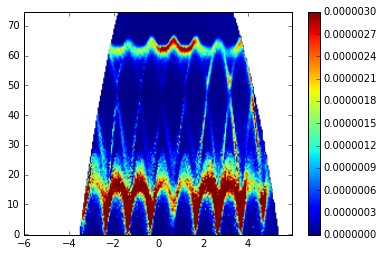

In [36]:
# plot
H.plot(hh.load("./slice_111.h5"), min=0, max=3e-6)